In [28]:
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

all_res_files = sorted(glob('test2/*.pkl'), key=lambda x: int(x.split('_')[-1].split('.')[0]))

In [29]:
def load_data(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    return data

all_res_data = [load_data(all_res_files[i]) for i in range(len(all_res_files)) if i % 40 == 0]

In [30]:
# pickle.dump(all_res_data, open('result/sty1/all_res_data.pkl', 'wb'))

In [31]:
M_mass = all_res_data[0]['M0']

t_array = np.array([data['t'] for data in all_res_data])
conversion_array = np.array([1 - data['M0'] / M_mass for data in all_res_data])
R_concentration_array = np.array([np.array(data['R_arr']).sum() for data in all_res_data])

def get_polyG_n_array(data):
    P_arr = np.array(data)
    idx_arr = np.linspace(1, len(P_arr), len(P_arr)).astype(int)
    return np.dot(idx_arr, P_arr) / np.sum(P_arr)

polyG_n_array = np.array([get_polyG_n_array(data['P_arr']) for data in all_res_data])

/tmp/ipykernel_35326/3105492603.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(idx_arr, P_arr) / np.sum(P_arr)


In [32]:
# apply smoothing to conversion_array and R_concentration_array
def smooth(data, window_size=1):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')
conversion_array_smooth = smooth(conversion_array)
R_concentration_array_smooth = smooth(R_concentration_array)
polyG_n_array_smooth = smooth(polyG_n_array)

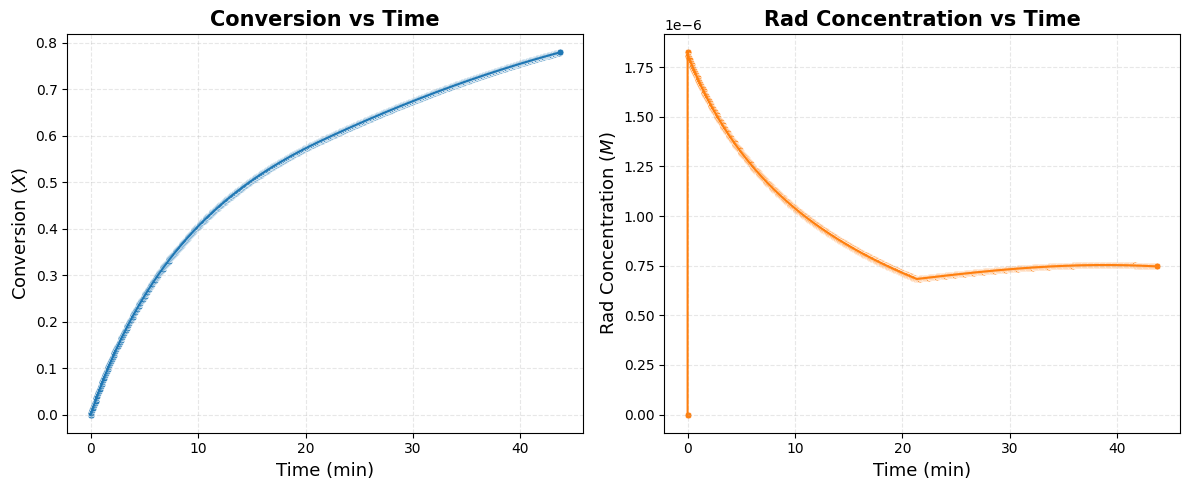

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create the improved plot with smaller points and better styling
plt.figure(figsize=(12, 5))

# First subplot - Conversion vs Time
plt.subplot(1, 2, 1)
plt.plot(t_array, conversion_array_smooth, '-', color='#1f77b4', linewidth=1.5)  # Line only
plt.scatter(t_array, conversion_array_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)  # Points with white edge
plt.xlabel('Time (min)', fontsize=13)
plt.ylabel(r'Conversion $(X)$', fontsize=13)
plt.title('Conversion vs Time', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Second subplot - Rad Concentration vs Time
plt.subplot(1, 2, 2)
plt.plot(t_array, R_concentration_array_smooth, '-', color='#ff7f0e', linewidth=1.5)  # Line only
plt.scatter(t_array, R_concentration_array_smooth, s=25, color='#ff7f0e', edgecolor='white', linewidth=0.5)  # Points with white edge
plt.xlabel('Time (min)', fontsize=13)
plt.ylabel(r'Rad Concentration $(M)$', fontsize=13)
plt.title('Rad Concentration vs Time', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
# plt.savefig('conversion_R_concentration.png')  # Uncomment to save the figure
plt.show()

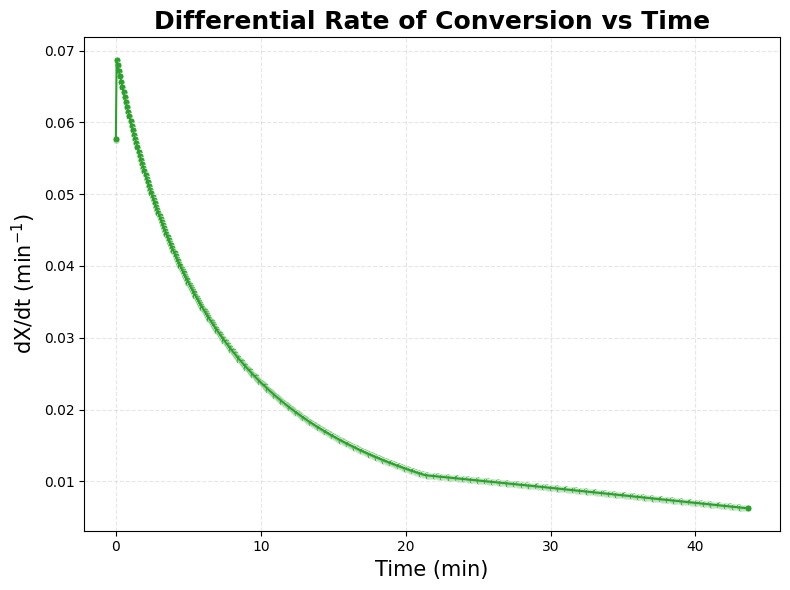

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the first derivative of conversion with respect to time
conversion_derivative = np.gradient(conversion_array_smooth, t_array)

# Create a figure with 3 subplots (original 2 plus the derivative)
plt.figure(figsize=(8, 6))

# # First subplot - Conversion vs Time (same as original)
# plt.subplot(1, 3, 1)
# plt.plot(t_array, conversion_array_smooth, '-', color='#1f77b4', linewidth=1.5)  # Line only
# plt.scatter(t_array, conversion_array_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)  # Points with white edge
# plt.xlabel('Time (min)', fontsize=13)
# plt.ylabel(r'Conversion $(X)$', fontsize=13)
# plt.title('Conversion vs Time', fontsize=15, fontweight='bold')
# plt.grid(True, alpha=0.3, linestyle='--')

# # Second subplot - Rad Concentration vs Time (same as original)
# plt.subplot(1, 3, 2)
# plt.plot(t_array, R_concentration_array_smooth, '-', color='#ff7f0e', linewidth=1.5)  # Line only
# plt.scatter(t_array, R_concentration_array_smooth, s=25, color='#ff7f0e', edgecolor='white', linewidth=0.5)  # Points with white edge
# plt.xlabel('Time (min)', fontsize=13)
# plt.ylabel(r'Rad Concentration $(M)$', fontsize=13)
# plt.title('Rad Concentration vs Time', fontsize=15, fontweight='bold')
# plt.grid(True, alpha=0.3, linestyle='--')

# # Third subplot - First Derivative of Conversion vs Time (new)
# plt.subplot(1, 3, 3)
plt.plot(t_array, conversion_derivative, '-', color='#2ca02c', linewidth=1.5)  # Line only
plt.scatter(t_array, conversion_derivative, s=25, color='#2ca02c', edgecolor='white', linewidth=0.5)  # Points with white edge
plt.xlabel('Time (min)', fontsize=15)
plt.ylabel(r'dX/dt (min$^{-1}$)', fontsize=15)
plt.title('Differential Rate of Conversion vs Time', fontsize=18, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
# plt.savefig('conversion_derivatives.png')  # Uncomment to save the figure
plt.show()

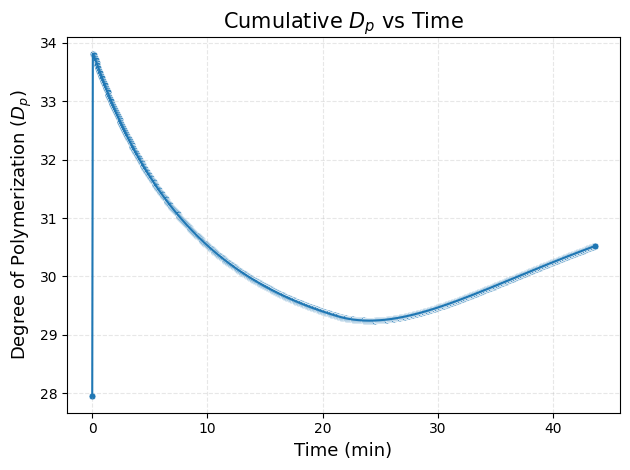

In [34]:
# # show polyG_n array against time
# plt.figure(figsize=(5, 5))
# plt.plot(t_array, polyG_n_array_smooth, 'o-')
# plt.xlabel('Time (s)')
# plt.ylabel('PolyG_n')
# plt.title('PolyG_n vs Time')
# plt.tight_layout()
# # plt.savefig('polyG_n.png')
# plt.show()

plt.plot(t_array, polyG_n_array_smooth, '-', color='#1f77b4', linewidth=1.5)  # Line only
plt.scatter(t_array, polyG_n_array_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)  # Points with white edge
plt.xlabel('Time (min)', fontsize=13)
plt.ylabel(r'Degree of Polymerization $(D_p)$', fontsize=13)
plt.title(r'Cumulative $D_p$ vs Time', fontsize=15)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

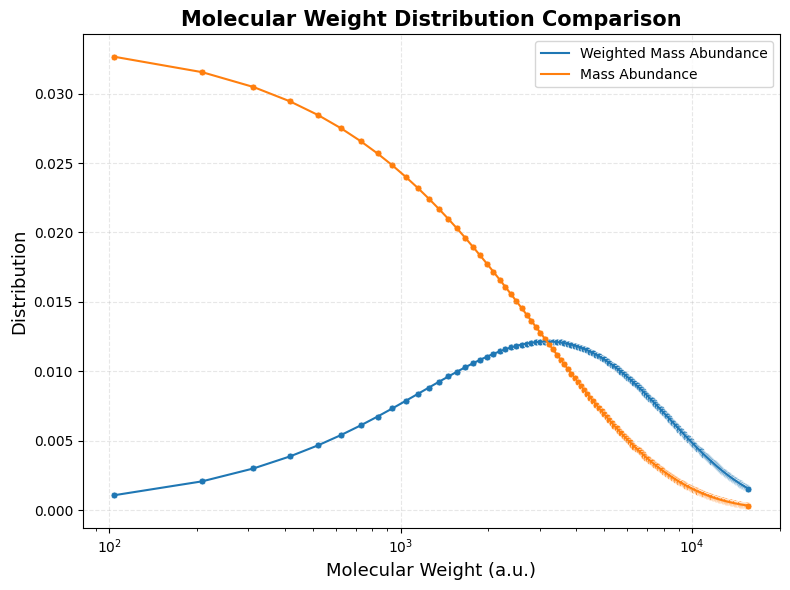

In [35]:
mol_weight = 104.12

P_arr = all_res_data[-1]['P_arr']
Pw_arr = np.power(np.linspace(1, len(P_arr), len(P_arr)), 1) * P_arr / np.sum(P_arr)
Pw_arr_smooth = smooth(Pw_arr)
X_arr = np.linspace(1, len(P_arr), len(P_arr)) * mol_weight

# # This is number abundance distribution
# plt.plot(X_arr, Pw_arr_smooth, '-', color='#1f77b4', linewidth=1.5)  # Line only
# plt.scatter(X_arr, Pw_arr_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)  # Points with white edge
# plt.xlabel('Molecular Weight (a.u.)', fontsize=11)
# plt.ylabel('Distribution', fontsize=11)
# plt.title('Molecular Weight Distribution ()', fontsize=13, fontweight='bold')
# plt.grid(True, alpha=0.3, linestyle='--')
# plt.xscale('log')
# plt.tight_layout()
# plt.show()

# # This is mass abundance distribution
# mol_weight = 104.12

# P_arr = all_res_data[-1]['P_arr']
# Pw_arr = np.power(np.linspace(1, len(P_arr), len(P_arr)), 0) * P_arr / np.sum(P_arr)
# Pw_arr_smooth = smooth(Pw_arr)
# X_arr = np.linspace(1, len(P_arr), len(P_arr)) * mol_weight
# # plt.plot(Pw_arr)
# # plt.xscale('log')
# # plt.title('Weight-Average MW distribution')

# plt.plot(X_arr, Pw_arr_smooth, '-', color='#1f77b4', linewidth=1.5)  # Line only
# plt.scatter(X_arr, Pw_arr_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)  # Points with white edge
# plt.xlabel('Molecular Weight (a.u.)', fontsize=11)
# plt.ylabel('Distribution', fontsize=11)
# plt.title('Molecular Weight Distribution', fontsize=13, fontweight='bold')
# plt.grid(True, alpha=0.3, linestyle='--')
# plt.xscale('log')
# plt.tight_layout()
# plt.show()


# Create figure and axis for the combined plot
plt.figure(figsize=(8, 6))

# Number abundance distribution (w=1)
Pw_arr_number = np.power(np.linspace(1, len(P_arr), len(P_arr)), 1) * P_arr / np.sum(np.power(np.linspace(1, len(P_arr), len(P_arr)), 1) * P_arr)
Pw_arr_number_smooth = smooth(Pw_arr_number)

# Mass abundance distribution (w=0)
Pw_arr_mass = np.power(np.linspace(1, len(P_arr), len(P_arr)), 0) * P_arr / np.sum(np.power(np.linspace(1, len(P_arr), len(P_arr)), 0) * P_arr)
Pw_arr_mass_smooth = smooth(Pw_arr_mass)

# Plot number distribution
plt.plot(X_arr, Pw_arr_number_smooth, '-', color='#1f77b4', linewidth=1.5, label='Weighted Mass Abundance')
plt.scatter(X_arr, Pw_arr_number_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)

# Plot mass distribution
plt.plot(X_arr, Pw_arr_mass_smooth, '-', color='#ff7f0e', linewidth=1.5, label='Mass Abundance')
plt.scatter(X_arr, Pw_arr_mass_smooth, s=25, color='#ff7f0e', edgecolor='white', linewidth=0.5)

# Set labels and title
plt.xlabel('Molecular Weight (a.u.)', fontsize=13)
plt.ylabel('Distribution', fontsize=13)
plt.title('Molecular Weight Distribution Comparison', fontsize=15, fontweight='bold')

# Add grid, legend and set log scale
plt.grid(True, alpha=0.3, linestyle='--')
plt.xscale('log')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
mol_weight = 104.12
Mn = np.sum(P_arr * np.linspace(1, len(P_arr), len(P_arr))) / np.sum(P_arr) * mol_weight
Mw = np.sum(P_arr * np.power(np.linspace(1, len(P_arr), len(P_arr)), 2)) / np.sum(P_arr * np.linspace(1, len(P_arr), len(P_arr))) * mol_weight

print(f'Mn: {Mn:.0f}, Mw: {Mw:.0f}, Mw/Mn: {Mw/Mn :.2f}')

Mn: 3178, Mw: 5947, Mw/Mn: 1.87
